# M5 - WEEK 5 | PROJECT: Communicating your Data Insights

**Business Background:**

In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding.


**Project Scope:**

1. Super Hero Characterstics:

   * Gender -> What is the gender percentages of SuperHero?
   * Publisher -> Who are the Publisher of SuperHero?
   * Role-> How is role of Super hero?
   * Race -> Which Race of SuperHero are most?
   * Hair color -> How SuperHero's Hair colors shown in dataset? 
   

2. Super Hero Powers Insights:

   * Total powers -> Power possessed by super hero
   * Power distribution -> Male and Female super hero power owners
   

3. Linear Regresssion:

   * Supuer hero Height and Weight
   * Super Hero Powers Vs Height/Weight
   

4. Hypothesis Testing: 

   * Super hero 'Gender' Vs 'Powers'

**Steps:**

Use one of the datasets below and do the following:
* State the goal you aim to achieve, i.e. the main relationship you plan to investigate and why you think it is interesting/important to investigate it.
* Import, if appropriate for the use case you chose merge, and clean the data.
* Build different types of visualizations that you view appropriate (scatter, line plots, box plots etc). What conclusions do you draw from them? Use the visualizations wisely, they should enhance the story, not overload the reader/the person to whom you will present your results.
* Find linear relationships in the data by using correlation plots. What story does the correlation plot tell you? What does it not?
* Investigate distributions of features (you may want to start from the target).
* Use hypothesis tests wisely to see if different groups in the data behave differently (you don’t need to test this for all features, only for a few which make sense to you).Upload your Jupyter notebook with code, extensive comments and markdown sections. Imagine you are writing this for a business audience with little technical background. Even if they are not able to follow your code, your reasoning and conclusions should be clear and understandable. Always err on the side of providing more text and explanations rather than too little.
 


**Data Source:** 

Airbnb dataset:https://www.kaggle.com/claudiodavi/superhero-set


**Tool and Packages:**

 * python language 3.7.2
 * python library : numpy, pandas, matplotlib.pyplot

**Importing and Loding Dataset:**

In [1]:
#import pacakages and libs:

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Statistics module 
import statistics 
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
import scipy.stats

In [2]:
#load the 'heroes_information.csv' dataset using panda:
hero = pd.read_csv("heroes_information.csv", index_col='Unnamed: 0',na_values='-')
print("***FIRST 5 ROWS OF DATAFRAME***\n")
hero.head()

***FIRST 5 ROWS OF DATAFRAME***



,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0


In [3]:
#changing the defaults limits for jupyter notebook: will have to see 168 columns
pd.set_option('display.max_columns', 168)


#load the 'heroes_information.csv' dataset using panda:
power = pd.read_csv("super_hero_powers.csv")
print("***FIRST 5 ROWS OF DATAFRAME***\n")
power.head()


***FIRST 5 ROWS OF DATAFRAME***



,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

**Exploring and Cleaning Dataset:** 

* check for duplicates
* check for missing value
* chech for shape
* check for data types

*Exploring: Hero Dataset*

In [4]:
print("\n\n***SHAPE OF DATAFRAME***\n")
print(hero.shape)

print("\n\n***DATA TYPES OF ALL COLUMN's DATAFRAME***\n")
print(hero.dtypes)

print("\n\n***INFO DETAIL's OF DATAFRAME***\n")
print(hero.info())

print("\n\n***PERCENTAGE OF MISSING VALUES:***\n")
hero.isnull().sum() * 100 / len(hero)




***SHAPE OF DATAFRAME***

(734, 10)


***DATA TYPES OF ALL COLUMN's DATAFRAME***

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object


***INFO DETAIL's OF DATAFRAME***

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        705 non-null object
Eye color     562 non-null object
Race          430 non-null object
Hair color    562 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    72 non-null object
Alignment     727 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB
None


***PERCENTAGE OF MISSING VALUES:***



name           0.000000
Gender         3.950954
Eye color     23.433243
Race          41.416894
Hair color    23.433243
Height         0.000000
Publisher      2.043597
Skin color    90.190736
Alignment      0.953678
Weight         0.272480
dtype: float64

It has 'Skin color' that needs to be drop, since it has more than 90% missing values. 

In [5]:
#dropping 'Skin color' column: 90% are missing values!
hero=hero.drop('Skin color',axis=1)


*Exploring: Power Dataset*

Its having 168 columns with all Bool type!

In [6]:
print("\n\n***SHAPE OF DATAFRAME***\n")
print(power.shape)


print("\n\n***INFO DETAIL's OF DATAFRAME***\n")
print(power.info())




***SHAPE OF DATAFRAME***

(667, 168)


***INFO DETAIL's OF DATAFRAME***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


**Exploratory Data Analysis**

Let's do some deeper analysis to 'hero' and 'power' datasets:

*EDA: hero dataset*


In [7]:
#summary statistics:
hero.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,734.0,102.254087,139.624543,-99.0,-99.0,175.0,185.0,975.0
Weight,732.0,43.855191,130.823733,-99.0,-99.0,62.0,90.0,900.0


looks some extreem value in Height and Weight. lets boxplot to see and clip it for better analysis.

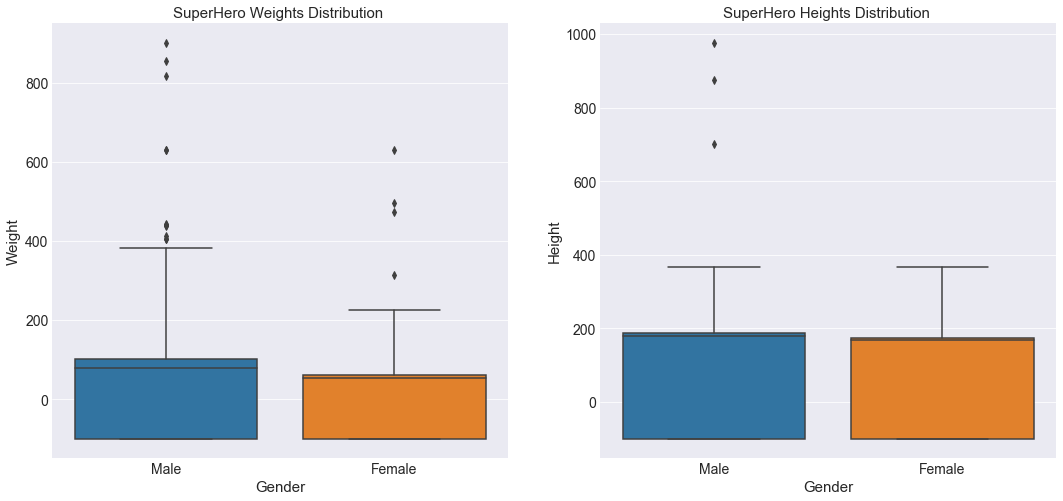

In [8]:
#boxplot for Weight:
plt.style.use('seaborn-darkgrid')
fig=plt.figure(figsize=(18,8))
fig.add_subplot(1,2,1)
sns.boxplot(x='Gender',y='Weight',data=hero)
plt.title("SuperHero Weights Distribution " , fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Weight', fontsize=15)

#boxplots for Height:
fig.add_subplot(1,2,2)
sns.boxplot(x='Gender',y='Height',data=hero)
plt.title("SuperHero Heights Distribution " , fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Height', fontsize=15)
plt.show()

looks like there are some extreems that needs to clip:

In [9]:
#clipping it to upper and lower bound:
hero['Height'] = hero['Height'].clip(upper=600, lower=0)
hero['Weight'] = hero['Weight'].clip(upper=250, lower=0)

*Insight-1: What is the gender percentages of SuperHero?*

Lets see how the Female and Male ratio among SuperHero:

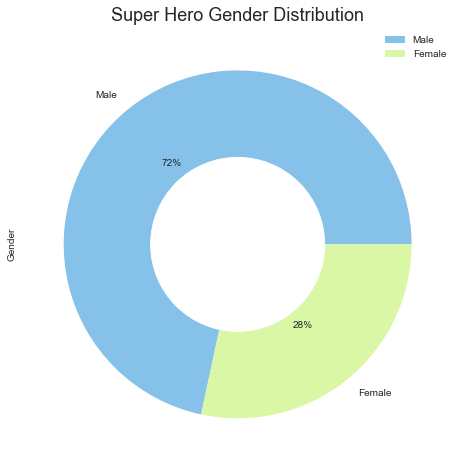

In [10]:
#doughnut plot:
fig=plt.figure(figsize=(15,8))
hero.Gender.value_counts().plot(kind='pie', labels=['Male', 'Female'], colors=['#85C1E9','#DAF7A6'], autopct='%1.0f%%')

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Super Hero Gender Distribution', fontsize=18)
plt.legend()
plt.show()


There is observation that 72% are Male Super hero, looks we need to create more wonder womens!!

*Insight-2: Who are the Publisher of SuperHero?*

Lets check who are the famous publishers who are launching super heros more:

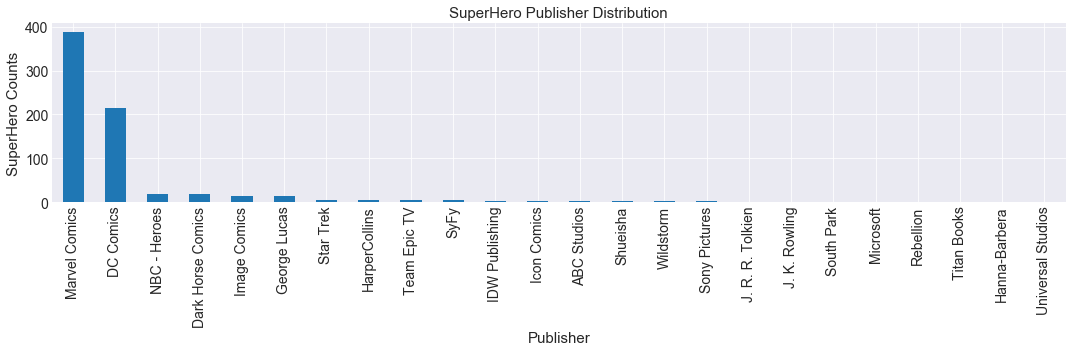

In [11]:
#bar plot for the publisher:

fig=plt.figure(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
hero.Publisher.value_counts().plot(kind='bar')
plt.xlabel('Publisher', fontsize=15)
plt.ylabel('SuperHero Counts', fontsize=15)
plt.title("SuperHero Publisher Distribution" , fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

Marvel being the TOP!! DC Comics is second one.

*Insight-3: How is role of Super hero?*

Lets see what kind of role SuperHero are playing:

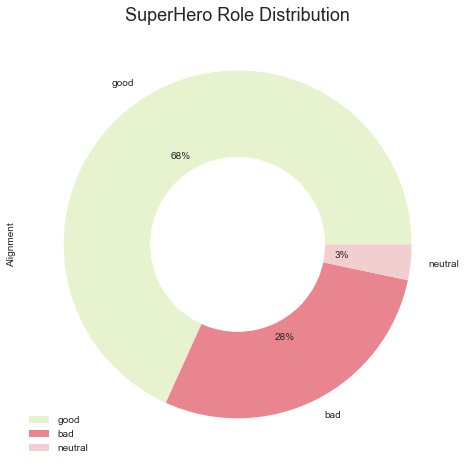

In [12]:
#doughnut plot for role:
fig=plt.figure(figsize=(15,8))
hero.Alignment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['#E6F3CE', '#E9858E', '#F3CED1'])

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('SuperHero Role Distribution', fontsize=18)
plt.legend()
plt.show()

Interesting to know that 28% bad role Super Hero are there..should we call them Super Villains:-)


*Insight-4: Which Race of SuperHero are most?*

check out for the SuperHero races, which one is most created..

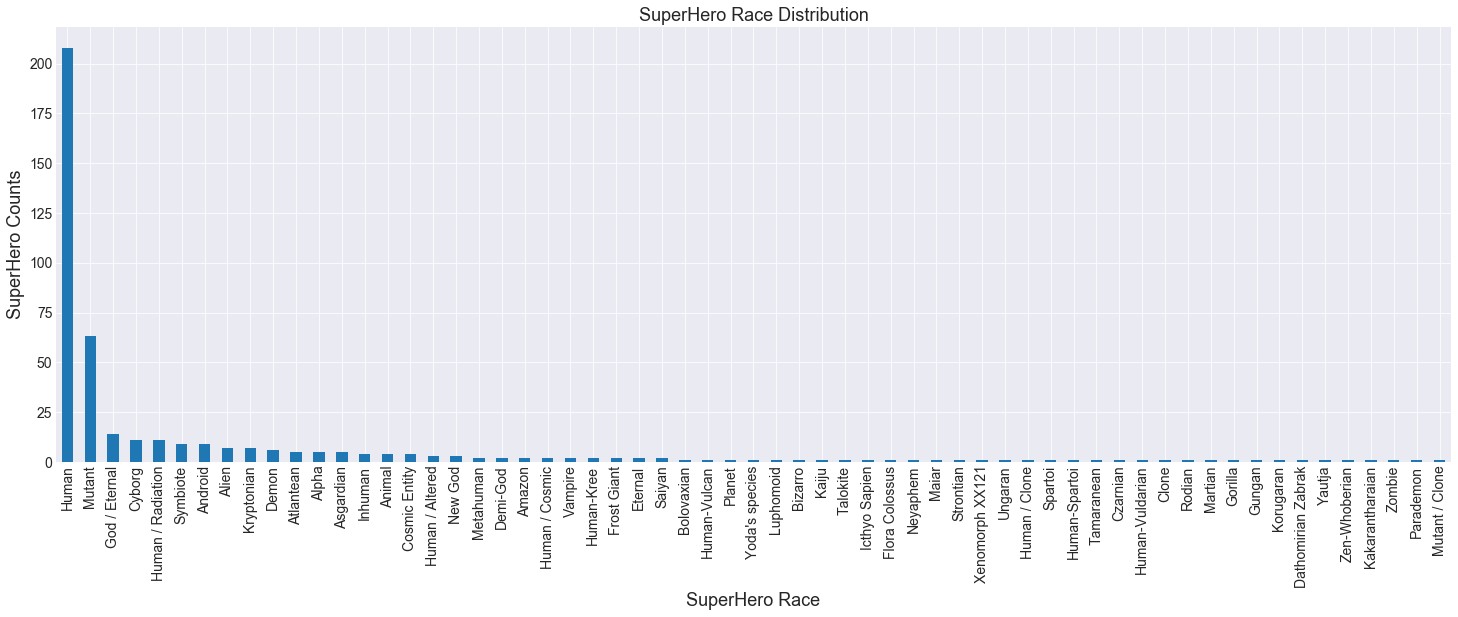

In [13]:
#bar plot for race:

fig=plt.figure(figsize=(25,8))
plt.style.use('seaborn-darkgrid')

#selecting Race column to plot:
hero.Race.value_counts().plot(kind='bar')
plt.xlabel('SuperHero Race', fontsize=18)
plt.ylabel('SuperHero Counts', fontsize=18)
plt.title("SuperHero Race Distribution" , fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Human and Mutants are top among others incarnations!!

*Insight-5: How SuperHero's Hair colors shown in dataset?*

look for the hair and hair-color in super hero..

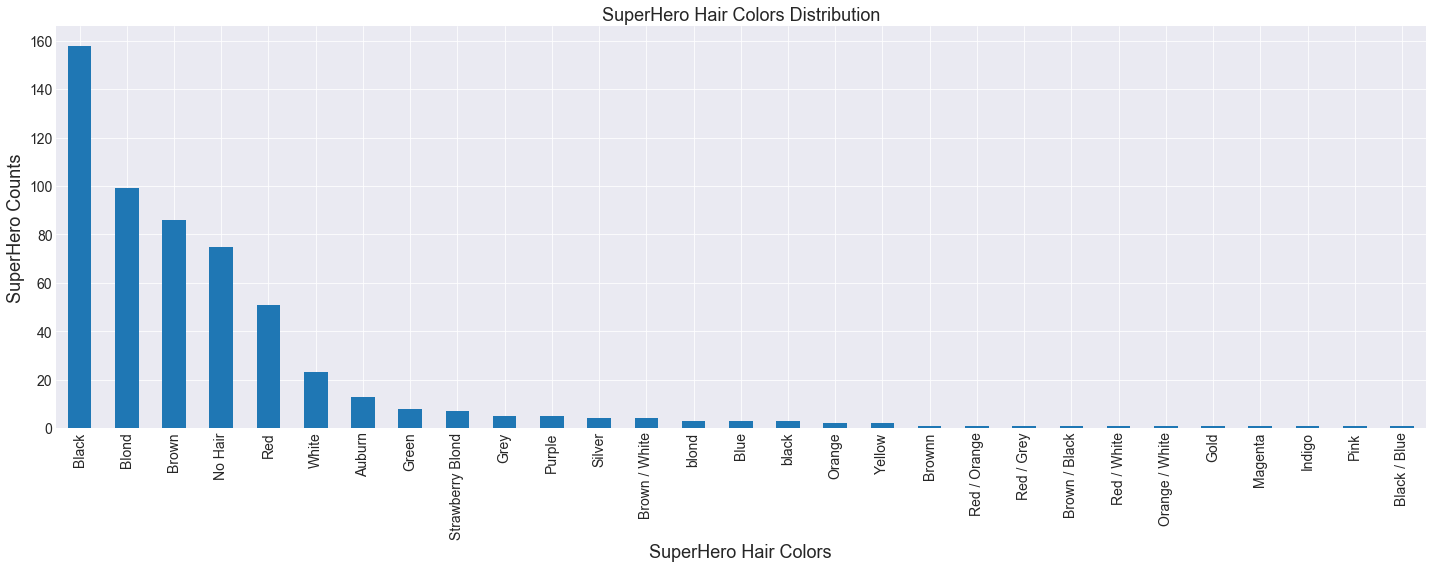

In [14]:
#bar plot for hair color:
fig=plt.figure(figsize=(20,8))
plt.style.use('seaborn-darkgrid')

#selecting Hair color column value for plot:
hero['Hair color'].value_counts().plot(kind='bar')
plt.xlabel('SuperHero Hair Colors', fontsize=18)
plt.ylabel('SuperHero Counts', fontsize=18)
plt.title("SuperHero Hair Colors Distribution" , fontsize=18, )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

Black hair super hero are topper! among all, there are bald Super-Hero too!! 

*EDA: power dataset*

lets see some interesting observation for powers of super hero!

In [15]:
#adding all powers row-wise and creating new colomn: 'total powers':
power['total powers']=power.iloc[:,1:].sum(axis=1)
power.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,...,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total powers
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,Fa

*Insight-6: Power possessed by super hero*

look for super heros total powers:

Lets explore, how many powers are possesed by each super hero:

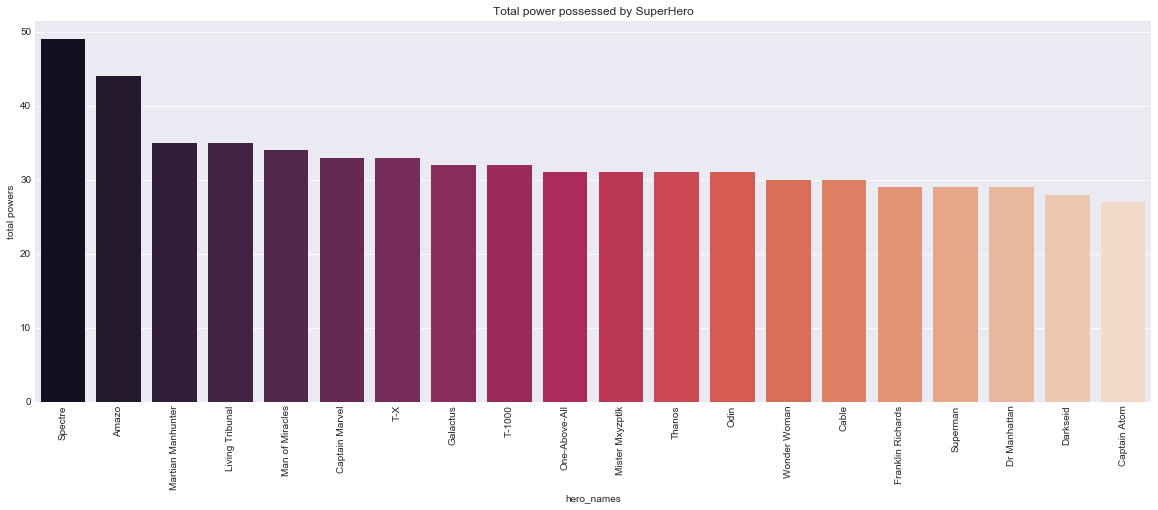

In [16]:
#selecting total powers for dataset:

df=power[['hero_names','total powers']].sort_values('total powers',ascending=False)
plt.style.use('seaborn-darkgrid')
fig=plt.figure(figsize=(20,7))
fig.add_subplot(1,1,1)

#seaborn barplot:
sns.barplot(x='hero_names',y='total powers',data=df.head(20), palette="rocket")
plt.xticks(rotation=90)
plt.title("Total power possessed by SuperHero")
plt.show()

Spectre is top, haing most number of powers! clost 50 different powers...super cool! 

*Insight-7 : Male and Female super hero power owners*

Explore that how powers are possessed by Male and Female super hero:

In [17]:
#merge 'hero' and 'power' dataframe:
mf_power = hero.merge(power[['hero_names', 'total powers']],
                    how='inner',right_on='hero_names',left_on='name')

mf_power.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,hero_names,total powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,250.0,A-Bomb,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,Abe Sapien,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,Abin Sur,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,250.0,Abomination,8
4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,bad,0.0,Abraxas,14


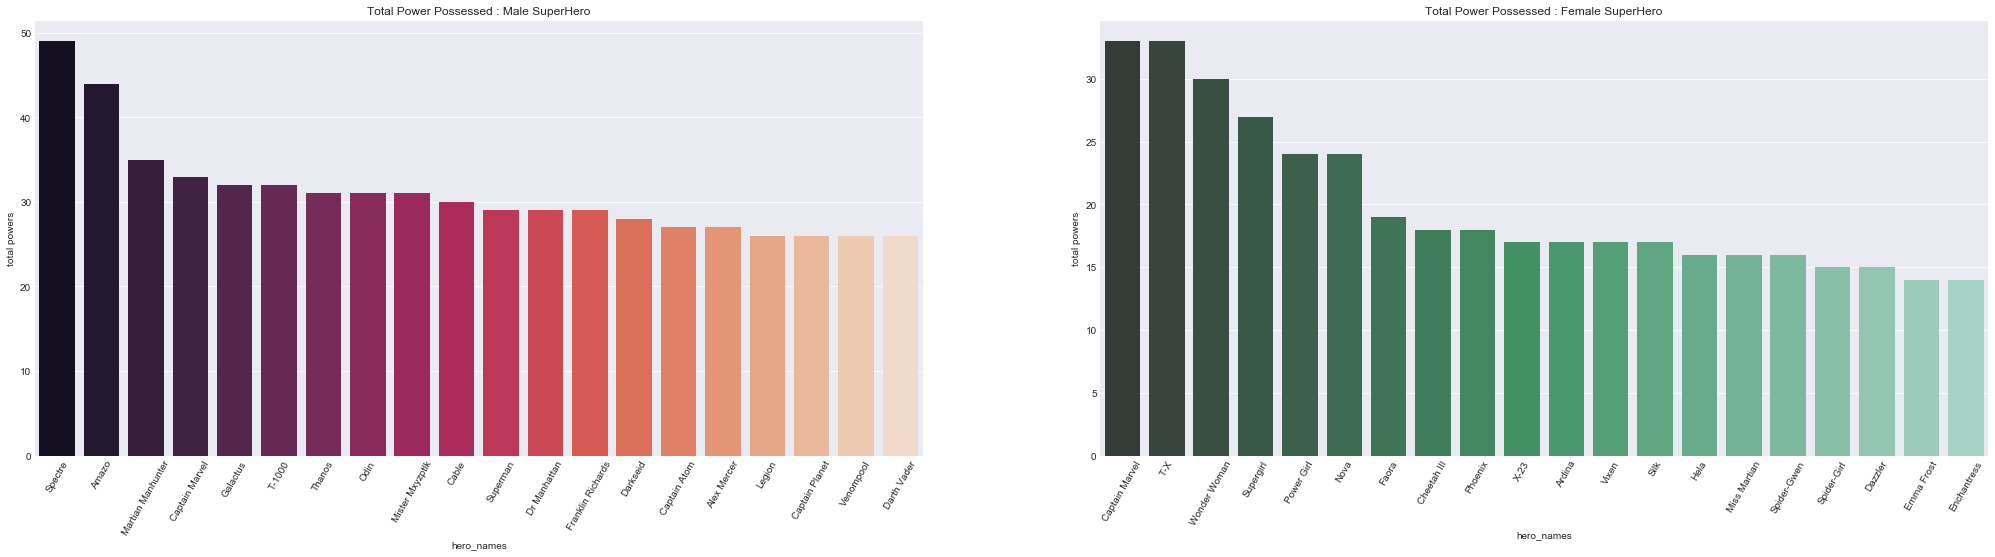

In [18]:
#selecting male total power dataset:
male_total_power = mf_power[mf_power['Gender'] == 'Male']
male_total_power = male_total_power[['hero_names', 'total powers']]

#selecting female total power dataset:
female_total_power = mf_power[mf_power['Gender'] == 'Female']
female_total_power = female_total_power[['hero_names', 'total powers']]

#selecting total power and male hero names:
df=male_total_power[['hero_names','total powers']].sort_values('total powers',ascending=False)
fig=plt.figure(figsize=(35,8))
fig.add_subplot(1,2,1)
sns.barplot(x='hero_names',y='total powers',data=df.head(20),palette="rocket")
plt.title('Total Power Possessed : Male SuperHero')
plt.xticks(rotation=60)

#selecting total power and female hero names:
df=female_total_power[['hero_names','total powers']].sort_values('total powers',ascending=False)
fig.add_subplot(1,2,2)
sns.barplot(x='hero_names',y='total powers',data=df.head(20),palette="BuGn_d")
plt.title('Total Power Possessed : Female SuperHero')
plt.xticks(rotation=60)
plt.show()


Spectre in Male and Captain Marvel in Female are the toppers! they possess more powers than others...

**Linear Regression:** 

Find linear relationships in the data by using correlation plots. What story does the correlation plot tell you? What does it not?

*Distribution of Height: SuperHero Male and Female*

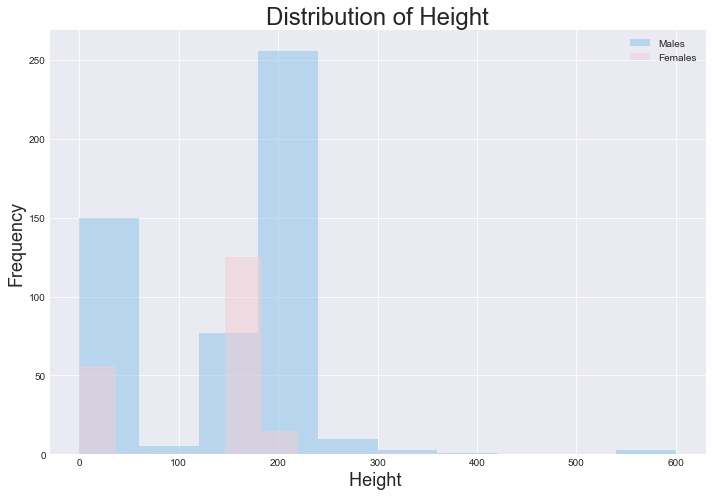

In [19]:
#histogram plot for Height:

plt.style.use('seaborn-darkgrid')

#selecting Male Height:
hero[hero['Gender']=='Male'].Height.plot(kind='hist',color='#85C1E9',figsize=(10,7), alpha=0.5)

#selecting Female Height:
hero[hero['Gender']=='Female'].Height.plot(kind='hist',color='#F3CED1',figsize=(10,7), alpha=0.5)

#Adding figure attributes:
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height ', size=18)
plt.ylabel('Frequency', size=18)
plt.tight_layout()

* We can see that the two cluster of heights for Gender! one between 0-100 and second 200 
* Male super hero has more frequency count than Females.

*Distribution of Weight: SuperHero Male and Female*

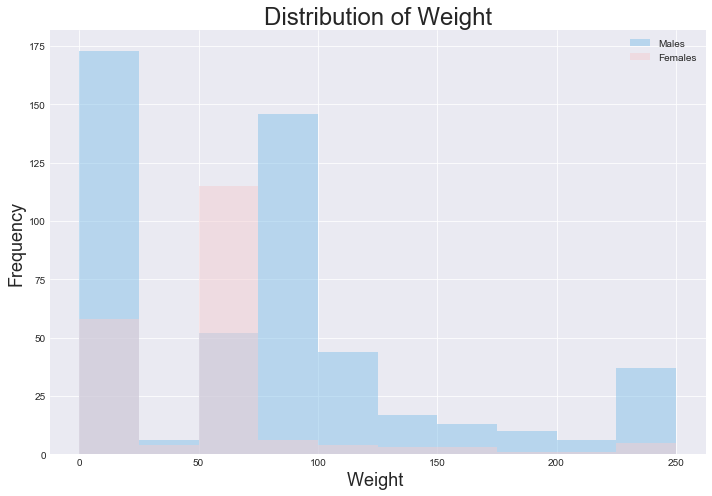

In [20]:
#histogram plot for Weight:

plt.style.use('seaborn-darkgrid')

#selecting male super hero weight:
hero[hero['Gender']=='Male'].Weight.plot(kind='hist',color='#85C1E9',figsize=(10,7), alpha=0.5)

#selecting female super hero weight:
hero[hero['Gender']=='Female'].Weight.plot(kind='hist',color='#F3CED1',figsize=(10,7), alpha=0.5)

#adding figure attributes:
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight ', size=18)
plt.ylabel('Frequency', size=18)
plt.tight_layout()

* There are 2 sets of Weights for super hero, actually not evenly distributed
* Male super hero weights are more than Females

*Relationship Between Height and Weight: SuperHero Male and Female*

Text(0, 0.5, 'Super Hero Weight')

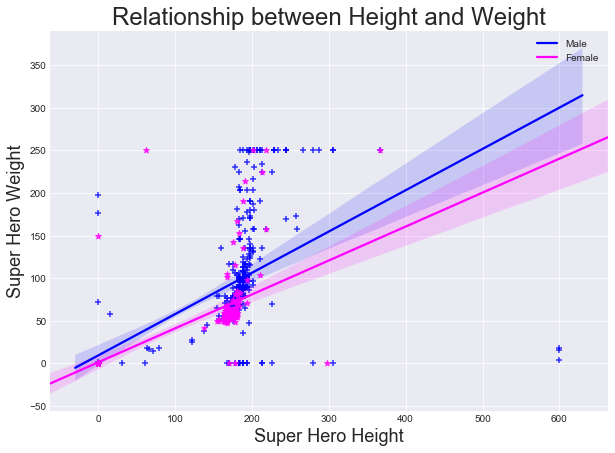

In [21]:
# male and female dataframe:
hero_males = hero[hero['Gender']=='Male']
hero_females = hero[hero['Gender']=='Female']

# Regression plot using seaborn:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(10,7))
sns.regplot(x=hero_males.Height,y=hero_males.Weight,color='blue', marker='+')
sns.regplot(x=hero_females.Height,y=hero_females.Weight,color='magenta', marker='*')

# Legend, title and labels:
plt.legend(labels=['Male','Female'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Super Hero Height', size=18)
plt.ylabel('Super Hero Weight', size=18)

* The plot shows a positive linear relation between height and weight for males and females!
* Male are higher values for Height adn Weight than Female super hero
* two sets are visible here for male and female Heights. what we saw in bar plot
* weights are more centrally scattered for female super hero

*Correlation: SuperHero Height and Weight*

Above can also be tested with correlation coefficient.

It used to measure the strength and direction of the linear relationship between two variables. It has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.

<Figure size 1296x360 with 0 Axes>

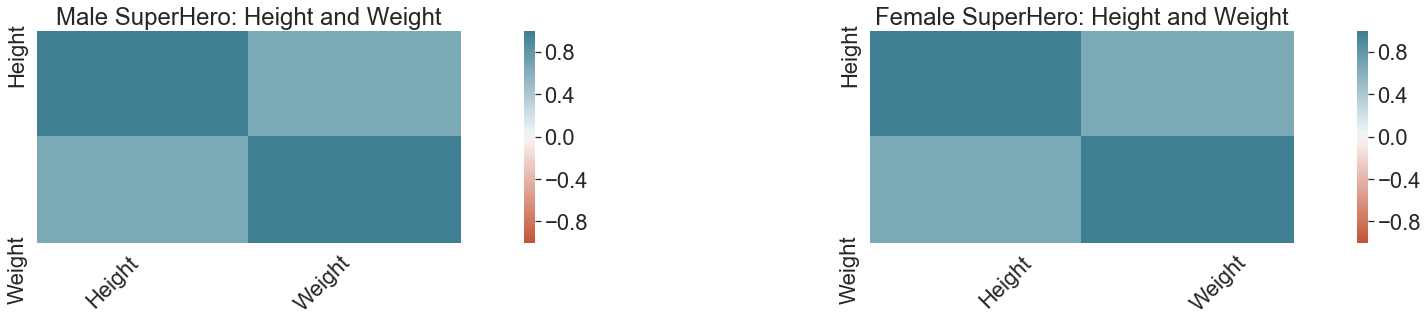

In [22]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(18,5))

# Dataframe containing only males.
hero_male = hero[hero['Gender']=='Male']
hero_male = hero_male[['Gender', 'Height', 'Weight']]

hero_female = hero[hero['Gender']=='Female']
hero_female = hero_male[['Gender', 'Height', 'Weight']]

# Correlation coefficients 
mcorr = hero_male.corr()
fcorr = hero_female.corr()

#creating subplots:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 5))

ax = sns.heatmap(
     mcorr, 
     vmin=-1, vmax=1, center=0,
     cmap=sns.diverging_palette(20, 220, n=200),
     square=True, ax=ax1)

ax.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Male SuperHero: Height and Weight")
plt.tight_layout()

ax = sns.heatmap(
     mcorr, 
     vmin=-1, vmax=1, center=0,
     cmap=sns.diverging_palette(20, 220, n=200),
     square=True, ax=ax2)

ax.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='left')
ax.set_title("Female SuperHero: Height and Weight")
plt.tight_layout()


Here its shows that strength of correlation VERY STRONGLY(0.8) correlated! For both Male and Female.
This plot confrms the linear relationship among super hero height and weight!

*Correlation : SuperHero Total Power Vs Weight/Height*

Lets see if the super hero powers are any way correlated to Height and Weights:

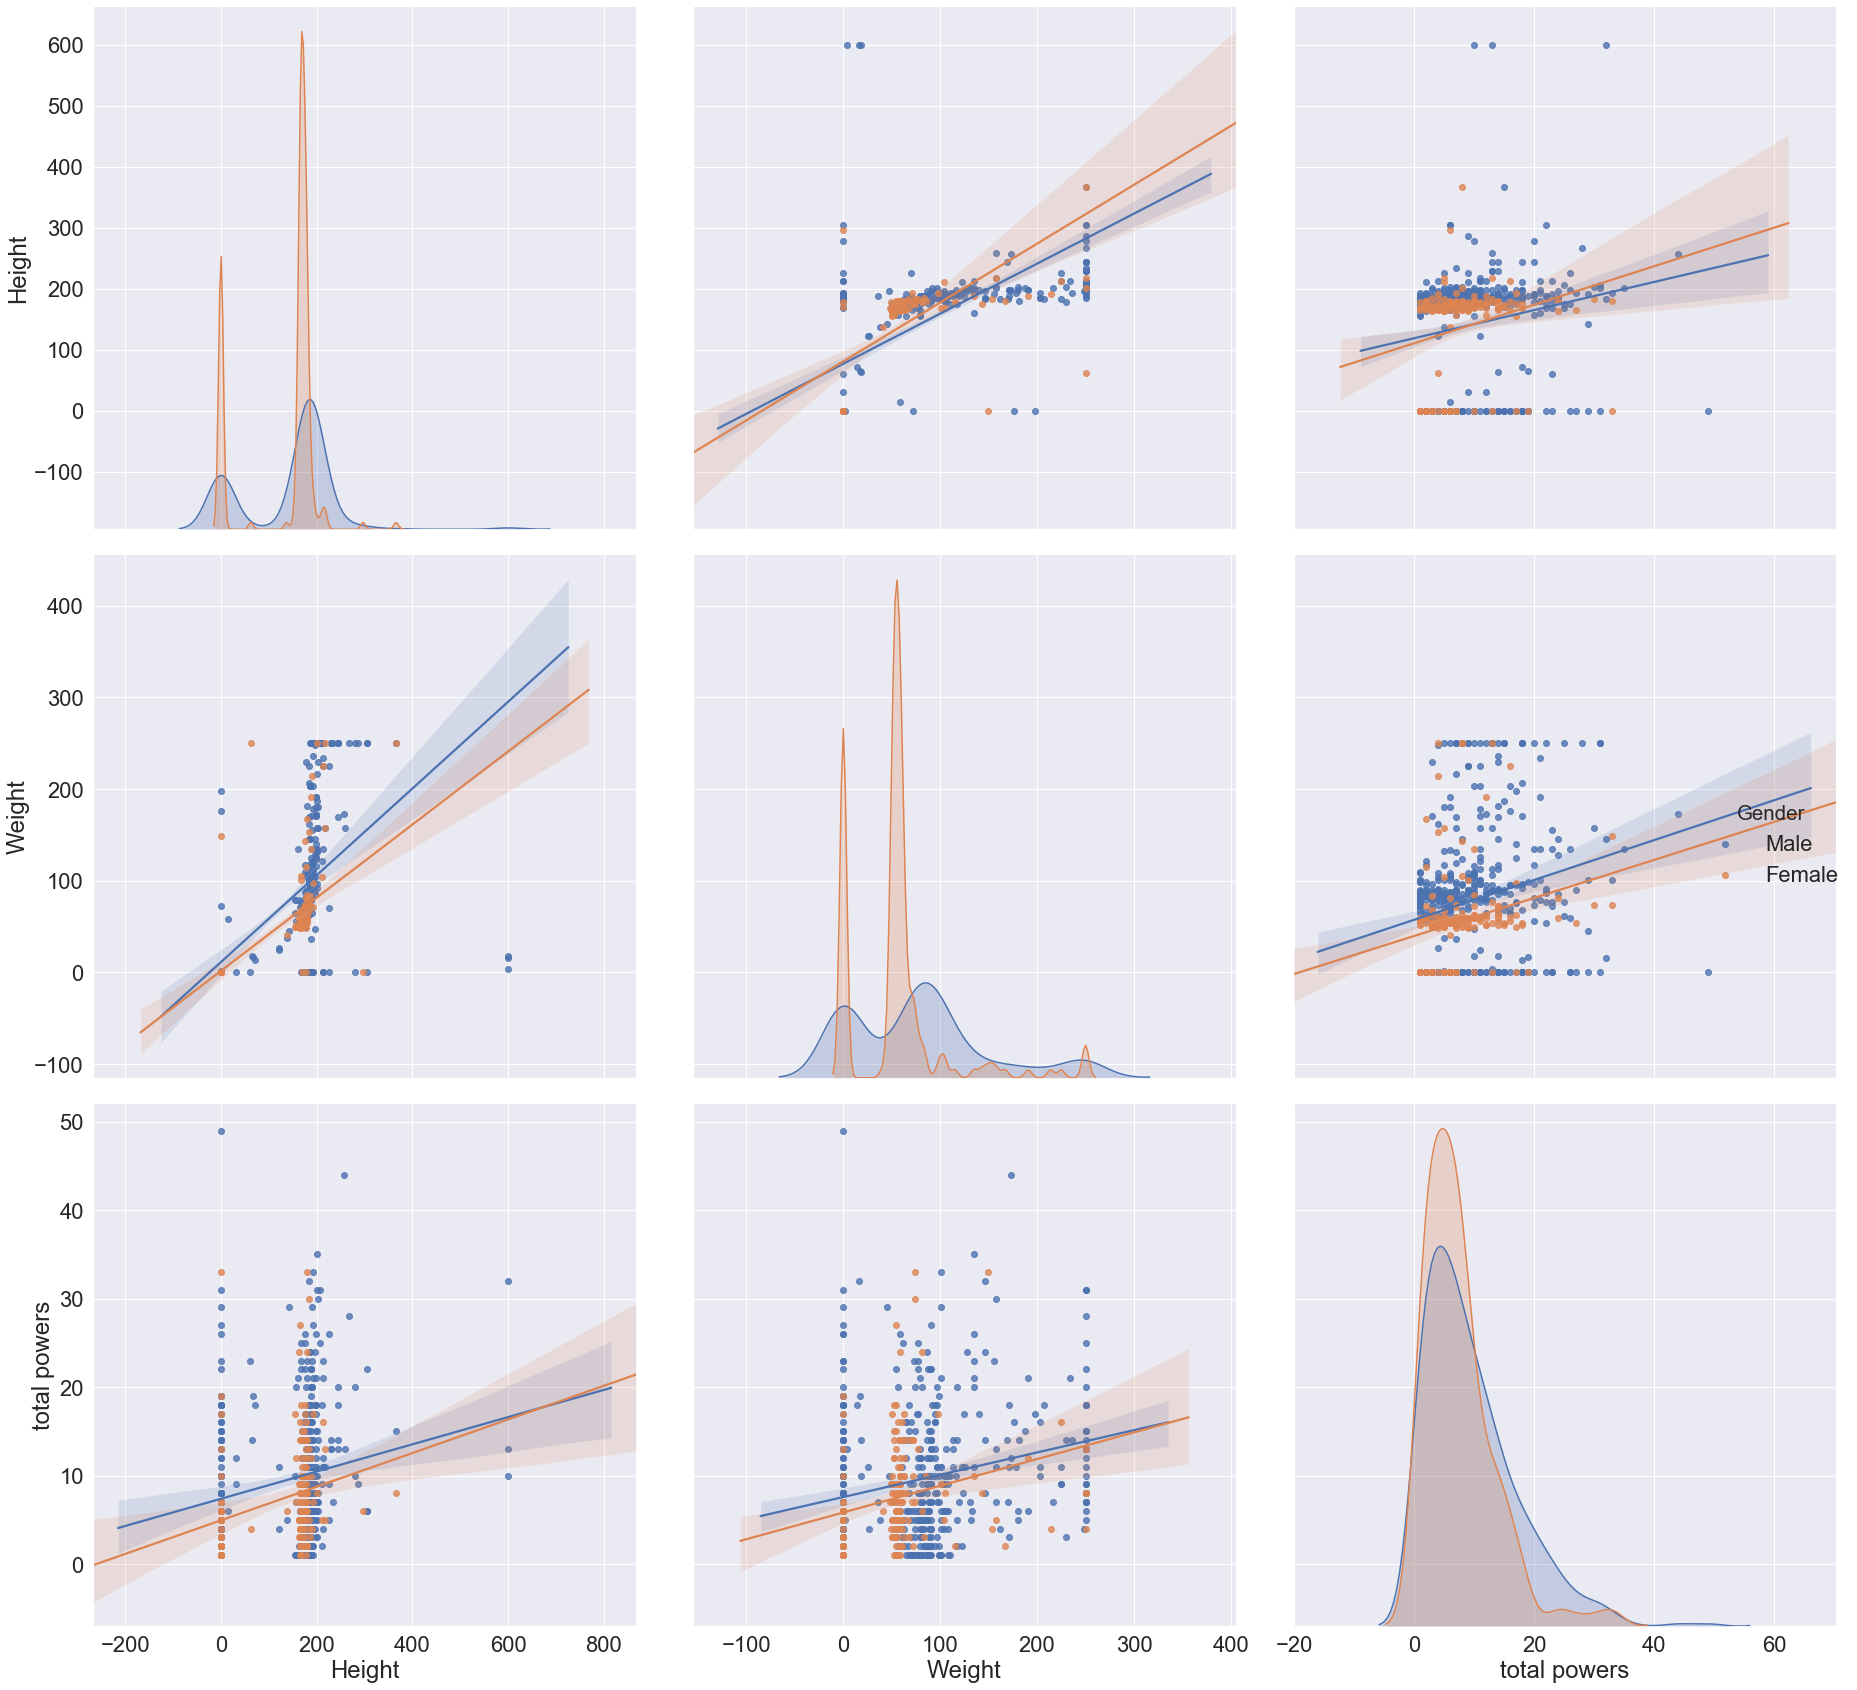

In [23]:
#pairplot for powers:
sns.pairplot(mf_power, kind='reg', size=8, hue='Gender')
plt.tight_layout()

Above various plots show that total powers are very weakly correlated with super powers Male and Females.

*Correlation Matrix: total powers Vs Height/Weights*

lets also check with corr statistics:

In [24]:
#correlation statistics:
print(np.corrcoef(mf_power['total powers'], mf_power['Weight']))
print(np.corrcoef(mf_power['total powers'], mf_power['Height']))

[[ 1. nan]
 [nan nan]]
[[1.         0.17331891]
 [0.17331891 1.        ]]


These statistics show very weak relation bewteen total powers and heights/weights for super heros! 

**Hypothesis Testing:**


*Test Chi-Square:*

Chi-square test, only provides statistical evidence of an association or relationship between the two categorical variables and NOT the correlation.

Lets establish our hypothesis, Idea is to refuse/reject 'Null Hypothisis' by providing enough test evidance from the test samples.

- Null Hypothesis(Ho) - There is NO reletionship between Gender and Powers
- Alternate Hypothesis(Ha) - There is reletionship between Gender and Powers

Lets test our hypothesis...


In [25]:
#merging dataset hero and power: adding 3 powers column into hero dataset
hero_power = hero.merge(power[['hero_names', 'Super Strength', 'Stamina', 'Durability' ]],
                    how='inner',right_on='hero_names',left_on='name')

hero_power.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,hero_names,Super Strength,Stamina,Durability
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,250.0,A-Bomb,True,True,True
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,Abe Sapien,True,True,True
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,Abin Sur,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,250.0,Abomination,True,True,False
4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,bad,0.0,Abraxas,True,False,False


Its always better to test bigger test sets/samples but its not practically possible.

There are 168 different powers, we could not test 'Gender Vs Power' in that huge extent! 
Creating only 3 TEST_SETs(Samples) for gender and powers.

* TEST_SET_1 : Gender and Super Strength
* TEST_SET_2 : Gender and Stamina
* TEST_SET_3 : Gender and Durability

In [26]:
#selecting Gender and Super Strength dataframe:
TEST_SET_1 = hero_power[['Gender', 'Super Strength']]
TEST_SET_1.head()

,Gender,Super Strength
0,Male,True
1,Male,True
2,Male,False
3,Male,True
4,Male,True


In [27]:
#Contingency Table:
contingency_table=pd.crosstab(TEST_SET_1["Gender"],TEST_SET_1["Super Strength"])
print('contingency_table :\n',contingency_table)

#Observed Values:
Observed_Values = contingency_table.values 


#Expected Values:
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]


#Degree of Freedom:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)


#Significance Level 5%
alpha=0.05

#chi-square statistic:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-", chi_square_statistic)

#critical_value:
critical_value=chi2.ppf(q=1-alpha,df=df)
print("\ncritical_value: ", critical_value)

#p-value:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print("\np-value:", p_value)

print("********************************************")
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print("********************************************")


contingency_table :
 Super Strength  False  True 
Gender                      
Female             90     88
Male              201    263

chi-square statistic:- 2.7232640763348934

critical_value:  3.841458820694124

p-value: 0.09889559194335407
********************************************
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2.7232640763348934
critical_value: 3.841458820694124
p-value: 0.09889559194335407
********************************************


In [28]:
#selecting Gender and Stamina dataframe:
TEST_SET_2 = hero_power[['Gender', 'Stamina']]
TEST_SET_2.head()

,Gender,Stamina
0,Male,True
1,Male,True
2,Male,False
3,Male,True
4,Male,False


In [29]:
#Contingency Table:
contingency_table=pd.crosstab(TEST_SET_2["Gender"],TEST_SET_2["Stamina"])
print('contingency_table :\n',contingency_table)

#Observed Values:
Observed_Values = contingency_table.values 


#Expected Values:
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]


#Degree of Freedom:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)


#Significance Level 5%
alpha=0.05

#chi-square statistic:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-", chi_square_statistic)

#critical_value:
critical_value=chi2.ppf(q=1-alpha,df=df)
print("\ncritical_value: ", critical_value)

#p-value:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print("\np-value:", p_value)

print("********************************************")
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print("********************************************")


contingency_table :
 Stamina  False  True 
Gender               
Female     109     69
Male       242    222

chi-square statistic:- 4.28074606897248

critical_value:  3.841458820694124

p-value: 0.038546425298848885
********************************************
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.28074606897248
critical_value: 3.841458820694124
p-value: 0.038546425298848885
********************************************


In [30]:
#selecting Gender and Durability dataset:
TEST_SET_3 = hero_power[['Gender', 'Durability']]
TEST_SET_3.head()

,Gender,Durability
0,Male,True
1,Male,True
2,Male,False
3,Male,False
4,Male,False


In [31]:
#Contingency Table:
contingency_table=pd.crosstab(TEST_SET_3["Gender"],TEST_SET_3["Durability"])
print('contingency_table :\n',contingency_table)

#Observed Values:
Observed_Values = contingency_table.values 


#Expected Values:
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]


#Degree of Freedom:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)


#Significance Level 5%
alpha=0.05

#chi-square statistic:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("\nchi-square statistic:-", chi_square_statistic)

#critical_value:
critical_value=chi2.ppf(q=1-alpha,df=df)
print("\ncritical_value: ", critical_value)

#p-value:
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print("\np-value:", p_value)

print("********************************************")
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print("********************************************")


contingency_table :
 Durability  False  True 
Gender                  
Female        119     59
Male          268    196

chi-square statistic:- 4.4448494761518855

critical_value:  3.841458820694124

p-value: 0.0350066760580362
********************************************
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4.4448494761518855
critical_value: 3.841458820694124
p-value: 0.0350066760580362
********************************************


*Conclusion and Analysis:*

* More test sets will be better for conclusion!
* Test samples shows that, chi stats > critical value(2 out of 3 tests)
* Hence, We reject the Null Hypotheis, based on our limited test sample's: There is a relationship between gender and powers variable!  